INF8770 Technologies multimédias

Polytechnique Montréal

Exemple de l'application de la méthode du codage prédicitif sur une image

In [1]:
import numpy as np
import matplotlib.pyplot as py

Lecture d'une image, conversion en tons de gris, conversion de l'image en float pour les calculs, et affichage 

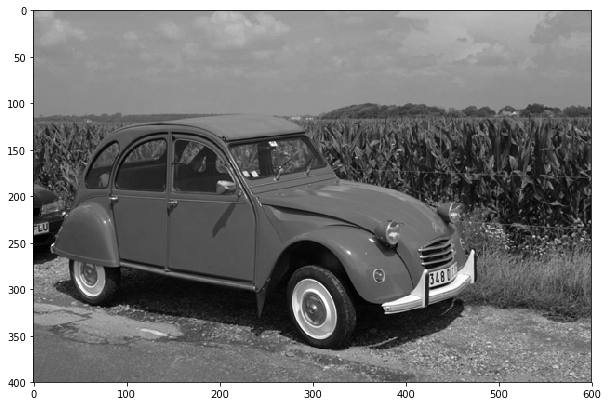

In [2]:
def rgb2gray(rgb):
    return np.dot(rgb[:,:], [0.299, 0.587, 0.114])

fig1 = py.figure(figsize = (10,10))
imagelue = py.imread('RGB.jpg')
image=imagelue.astype('float')
image=rgb2gray(image)
imageout=image.astype('uint8')
py.imshow(imageout,cmap = py.get_cmap('gray'))
py.show()

Histogramme des tons de gris. 

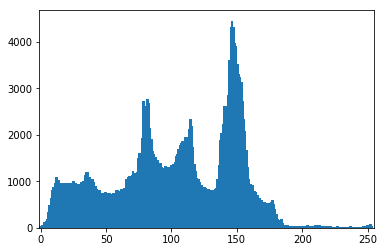

In [4]:
hist, intervalles = np.histogram(imageout, bins=256)
py.bar(intervalles[:-1], hist, width = 2)
py.xlim(min(intervalles)-1, max(intervalles))
py.show() 

Duplication des colonnes et rangées pour les frontières.

In [5]:
col=image[:,0]
image = np.column_stack((col,image))
col=image[:,len(image[0])-1]
image = np.column_stack((col,image))
row=image[0,:]
image = np.row_stack((row,image))
row=image[len(image)-1,:]
image = np.row_stack((row,image))

Matrice de prédiction. Un pixel est prédit à partir de ses 3 voisins. 

In [6]:
matpred = [[0.33,0.33],[0.33,0.0]]

Calcul des prédictions et des erreurs de prédictions.

In [7]:
erreur = np.zeros((len(image)-2,len(image[0])-2))
imagepred = np.zeros((len(image)-2,len(image[0])-2))
for i in range(1,len(image)-2):
    for j in range(1,len(image[0])-2):
        imagepred[i][j]=image[i-1][j-1]*matpred[0][0]+image[i-1][j]*matpred[0][1]+image[i][j-1]*matpred[1][0]
        erreur[i][j]=imagepred[i][j]-image[i][j]

Histogramme des erreurs. Plusieurs valeurs d'erreur se répètent.

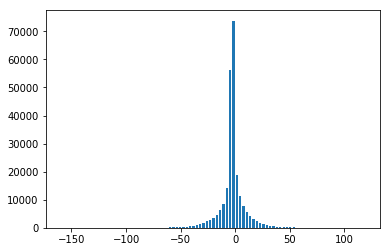

In [8]:
hist, intervalles = np.histogram(erreur, bins=100)
py.bar(intervalles[:-1], hist, width = 2)
py.xlim(min(intervalles)-1, max(intervalles))
py.show()  

Affichage de l'image prédite

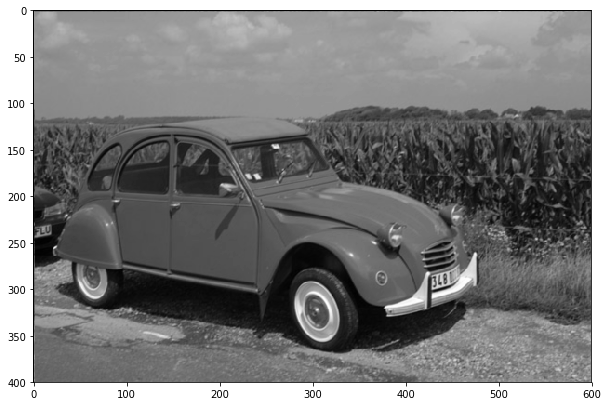

In [9]:
fig2 = py.figure(figsize = (10,10))
imageout=imagepred.astype('uint8')
py.imshow(imageout, cmap = py.get_cmap('gray'))
py.show()

Image des erreurs (amplifiées pour une meilleure visibilité)

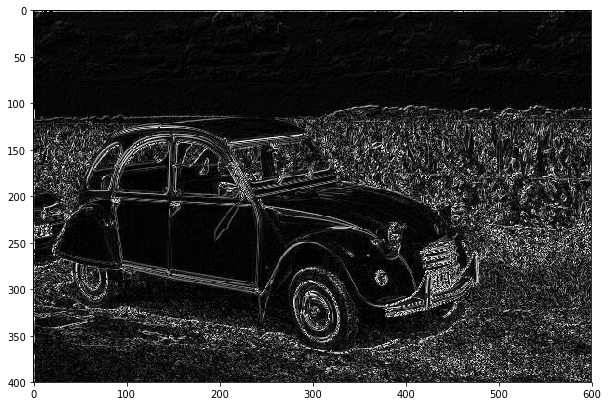

In [10]:
fig3 = py.figure(figsize = (10,10))
erreur=abs(erreur)*5
imageout=erreur.astype('uint8')
py.imshow(imageout, cmap = py.get_cmap('gray'))
py.show()